In [1]:
#importing the Libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the Dataset
dataset = pd.read_csv('insurance_pre.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
indep=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
dep=dataset['charges']

In [7]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 0.20, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'criterion': ['squared_error'],     # only best option
    'splitter': ['best'],               # simple split
    'max_depth': [5, None],             # shallow vs full tree
    'min_samples_split': [2, 10],       # basic vs stricter split
    'min_samples_leaf': [1, 4]          # leaf control
}

grid = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid,
    refit=True,
    verbose=2,   # reduced output for speed
    n_jobs=-1,
    cv=3
)
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [5, None],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10], 'splitter': ['best']},
             verbose=2)

In [11]:
# Predict using the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

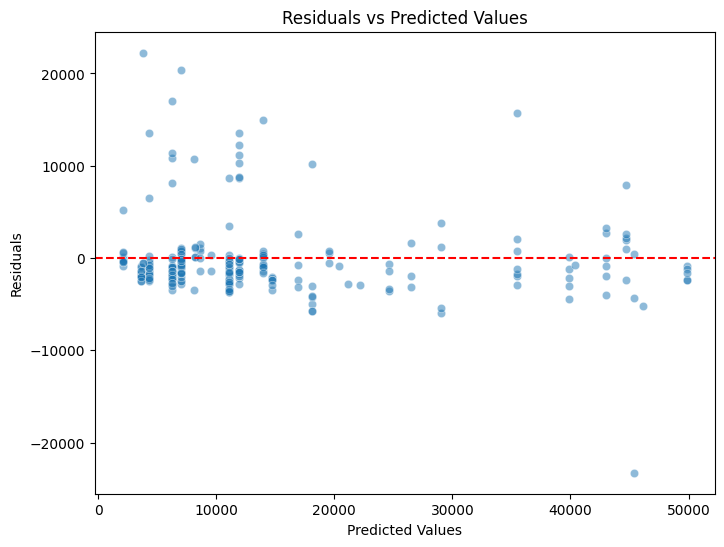

In [12]:
# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

# Assuming 'grid' is your GridSearchCV object and has been fitted to the data
print("Best parameters:", grid.best_params_)

# Access the mean test score for the best parameters
best_index = grid.best_index_
best_r2_score = grid.cv_results_['mean_test_score'][best_index]
# Printing the best R² score
print("r2:",best_r2_score)

Best parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
r2: 0.8338422170138697


In [14]:
table=pd.DataFrame.from_dict(grid.cv_results_)

In [15]:
table.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.003276,0.000023,0.005390,0.005404,squared_error,5,4,10,best,"{'criterion': 'squared_error', 'max_depth': 5,...",0.850747,0.837175,0.813605,0.833842,0.015345,1
2,0.004747,0.001480,0.001670,0.000078,squared_error,5,4,2,best,"{'criterion': 'squared_error', 'max_depth': 5,...",0.850747,0.837175,0.813605,0.833842,0.015345,1
1,0.006700,0.004702,0.004460,0.002052,squared_error,5,1,10,best,"{'criterion': 'squared_error', 'max_depth': 5,...",0.829489,0.832352,0.800870,0.820904,0.014214,3
0,0.004114,0.000428,0.003859,0.002639,squared_error,5,1,2,best,"{'criterion': 'squared_error', 'max_depth': 5,...",0.830124,0.832352,0.780770,0.814415,0.023808,4
7,0.009582,0.008067,0.005305,0.005046,squared_error,None,4,10,best,"{'criterion': 'squared_error', 'max_depth': No...",0.814294,0.790273,0.783214,0.795927,0.013304,5
6,0.012079,0.003016,0.004472,0.003323,squared_error,None,4,2,best,"{'criterion': 'squared_error', 'max_depth': No...",0.811767,0.790716,0.779868,0.794117,0.013243,6
5,0.006432,0.002905,0.001741,0.000104,squared_error,None,1,10,best,"{'criterion': 'squared_error', 'max_depth': No...",0.785201,0.781079,0.744592,0.770291,0.018249,7
4,0.006417,0.000863,0.005178,0.004805,squared_error,None,1,2,best,"{'criterion': 'squared_error', 'max_depth': No...",0.704546,0.604121,0.649717,0.652795,0.041056,8


In [16]:
# Assuming 'grid' is your GridSearchCV object that has been fitted to the data
best_model = grid.best_estimator_

In [18]:
import pickle
filename="RF_G.sav"
pickle.dump(best_model,open(filename,'wb'))
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8855614317811813
